<ipython-input-4-c5a81b6f2d12>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = le.fit_transform(data['gender'])
<ipython-input-4-c5a81b6f2d12>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married'] = le.fit_transform(data['ever_married'])
<ipython-input-4-c5a81b6f2d12>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Epoch 1/10
123/123 [==============================] - 2s 7ms/step - loss: 0.2038 - accuracy: 0.9562
Epoch 2/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9557
Epoch 3/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9539
Epoch 4/10
123/123 [==============================] - 0s 4ms/step - loss: 0.1787 - accuracy: 0.9554
Epoch 5/10
123/123 [==============================] - 1s 8ms/step - loss: 0.1743 - accuracy: 0.9554
Epoch 6/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9549
Epoch 7/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9539
Epoch 8/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9537
Epoch 9/10
123/123 [==============================] - 0s 3ms/step - loss: 0.1718 - accuracy: 0.9544
Epoch 10/10
31/31 [==============================] - 0s 2ms/step


0.9633401221995926

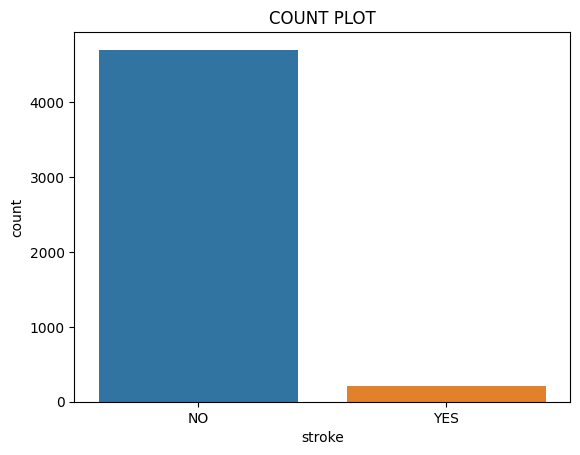

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
#Importing the data
data = pd.read_csv('/content/drive/MyDrive/CSV Files/Stroke Unbalanced.csv')
data=data.dropna()
df=data[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(data['gender'])
df['ever_married'] = le.fit_transform(data['ever_married'])
df['work_type'] = le.fit_transform(data['work_type'])
df['Residence_type'] = le.fit_transform(data['Residence_type'])
df['smoking_status'] = le.fit_transform(data['smoking_status'])
x = df.drop('stroke',axis=1)
y = df['stroke']
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test= tts(x,y,test_size=0.2)
#Model Creation and compilation
import tensorflow as tf
from tensorflow.keras.layers import Dense
ann = tf.keras.Sequential()
ann.add(Dense(units=25, activation='relu'))
ann.add(Dense(units=25,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile('adam','binary_crossentropy',metrics=['accuracy'])
result = ann.fit(x_train,y_train,epochs=10)
y_pred=[]
for i in ann.predict(x_test):
    if i>0.5:
        y_pred.append(1)
    if i<0.5:
        y_pred.append(0)


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[946   0]
 [ 36   0]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9633401221995926